In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
# date_time, maxtempC, mintempC, totalSnow_cm, sunHour, uvIndex, uvIndex, moon_illumination, moonrise, moonset, sunrise, sunset, DewPointC, FeelsLikeC, HeatIndexC, WindChillC, WindGustKmph, cloudcover, humidity, precipMM, pressure, tempC, visibility, winddirDegree, windspeedKmph

Combined Daily Weather Report

In [4]:
#Raw content URL for the dataset
url = "https://raw.githubusercontent.com/hastighsh/Ellehacks_2024/main/datasets/FinalDataSet2.csv"

#Specify the delimiter
delimiter = ','

#Read the data into a DataFrame
daily_weather_df = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
daily_weather_df_backup = daily_weather_df.copy()

In [5]:
daily_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,target
0,2008-07-10,25,16,0.0,8.0,4,47,01:52 PM,12:33 AM,06:22 AM,...,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
1,2008-07-10,25,16,0.0,8.0,4,47,01:52 PM,12:33 AM,06:22 AM,...,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
2,2014-06-30,30,22,0.0,10.0,6,16,08:49 AM,10:31 PM,05:34 AM,...,63,92,28.8,1006,30,7,198,16,Illinois,1
3,2014-07-01,26,18,0.0,15.0,6,23,09:46 AM,11:01 PM,05:34 AM,...,19,82,0.0,1007,26,10,265,17,Illinois,1
4,2014-07-02,18,14,0.0,5.0,4,30,10:42 AM,11:30 PM,05:35 AM,...,81,90,1.1,1015,18,7,297,13,Illinois,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2010-06-22,31,19,0.0,14.0,5,73,05:12 PM,02:09 AM,05:26 AM,...,31,76,6.2,1018,31,10,115,8,Newark,0
1049,2010-04-07,25,15,0.0,13.0,5,32,03:23 AM,01:21 PM,06:49 AM,...,9,63,0.0,1006,25,10,233,18,Northern Illinois,0
1050,2010-11-12,18,8,0.0,8.0,3,38,12:17 PM,10:54 PM,06:48 AM,...,49,73,2.3,1024,18,9,104,12,Illinois,0
1051,2010-09-14,33,16,0.0,12.0,7,38,01:58 PM,11:47 PM,07:00 AM,...,6,45,0.0,1016,33,10,281,10,Southern California,0


In [6]:
header_list = daily_weather_df.columns.tolist()
print(header_list)

['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location', 'target']


In [7]:
daily_weather_df.drop(columns=['uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise','sunset', 'DewPointC'], inplace=True)

In [8]:
header_list = daily_weather_df.columns.tolist()
print(header_list)
daily_weather_df

['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location', 'target']


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,target
0,2008-07-10,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
1,2008-07-10,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
2,2014-06-30,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,Illinois,1
3,2014-07-01,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,Illinois,1
4,2014-07-02,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,Illinois,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2010-06-22,31,19,0.0,14.0,27,27,25,18,31,76,6.2,1018,31,10,115,8,Newark,0
1049,2010-04-07,25,15,0.0,13.0,20,20,20,36,9,63,0.0,1006,25,10,233,18,Northern Illinois,0
1050,2010-11-12,18,8,0.0,8.0,11,12,11,25,49,73,2.3,1024,18,9,104,12,Illinois,0
1051,2010-09-14,33,16,0.0,12.0,25,25,25,17,6,45,0.0,1016,33,10,281,10,Southern California,0


Power Outage

In [9]:
#Raw content URL for adult-all.txt
url = "https://raw.githubusercontent.com/hastighsh/Ellehacks_2024/main/PowerOutageFinal.csv"

#Specify the delimiter (assuming it's a tab-separated file)
delimiter = ','

#Read the data into a DataFrame
power_outages_data = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
outage_backup = power_outages_data.copy()

HTTPError: HTTP Error 404: Not Found

In [10]:
power_outages_data

NameError: name 'power_outages_data' is not defined

In [11]:
# power_outages_data.drop(["Unnamed: 0", "NERC Region", "Demand Loss (MW)", "Number of Customers Affected"], axis=1)

In [12]:
daily_weather_df = daily_weather_df.rename(columns={'new_column': 'target'})
daily_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,target
0,2008-07-10,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
1,2008-07-10,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,San Francisco Bay Area,1
2,2014-06-30,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,Illinois,1
3,2014-07-01,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,Illinois,1
4,2014-07-02,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,Illinois,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2010-06-22,31,19,0.0,14.0,27,27,25,18,31,76,6.2,1018,31,10,115,8,Newark,0
1049,2010-04-07,25,15,0.0,13.0,20,20,20,36,9,63,0.0,1006,25,10,233,18,Northern Illinois,0
1050,2010-11-12,18,8,0.0,8.0,11,12,11,25,49,73,2.3,1024,18,9,104,12,Illinois,0
1051,2010-09-14,33,16,0.0,12.0,25,25,25,17,6,45,0.0,1016,33,10,281,10,Southern California,0


In [13]:
# tempd = daily_weather_df.drop(columns=["date_time","location"])
# labels = tempd['target']
# features = tempd.drop('target', axis=1)

# # Create a heatmap
# plt.figure(figsize=(24, 18))
# sns.heatmap(features, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Heatmap of Features')
# plt.show()

In [14]:
tempd = daily_weather_df.drop(columns=["date_time","location"])

In [15]:
tempd

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
0,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,1
1,25,16,0.0,8.0,19,20,19,14,68,91,25.3,1014,25,8,169,7,1
2,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,1
3,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,1
4,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,31,19,0.0,14.0,27,27,25,18,31,76,6.2,1018,31,10,115,8,0
1049,25,15,0.0,13.0,20,20,20,36,9,63,0.0,1006,25,10,233,18,0
1050,18,8,0.0,8.0,11,12,11,25,49,73,2.3,1024,18,9,104,12,0
1051,33,16,0.0,12.0,25,25,25,17,6,45,0.0,1016,33,10,281,10,0


In [16]:
df_normalized = (tempd - tempd.min()) / (tempd.max() - tempd.min())

In [17]:
df_normalized = df_normalized.sample(frac=1).reset_index(drop=True)

In [18]:
df_normalized

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
0,0.586207,0.584906,0.0,0.600000,0.647059,0.596491,0.698413,0.253731,0.19,0.604651,0.000962,0.649123,0.586207,1.000000,0.615616,0.282609,1.0
1,0.396552,0.452830,0.0,0.533333,0.426471,0.403509,0.460317,0.507463,0.29,0.604651,0.028846,0.894737,0.396552,0.888889,0.141141,0.521739,0.0
2,0.793103,0.735849,0.0,0.666667,0.764706,0.736842,0.825397,0.149254,0.46,0.825581,0.040385,0.649123,0.793103,0.888889,0.672673,0.152174,0.0
3,0.637931,0.603774,0.0,0.800000,0.647059,0.578947,0.698413,0.134328,0.13,0.581395,0.000000,0.842105,0.637931,1.000000,0.429429,0.152174,0.0
4,0.655172,0.603774,0.0,0.666667,0.647059,0.596491,0.698413,0.298507,0.17,0.872093,0.000000,0.578947,0.655172,1.000000,0.369369,0.282609,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,0.879310,0.886792,0.0,0.933333,0.926471,0.912281,0.952381,0.164179,0.28,0.709302,0.000000,0.578947,0.879310,0.777778,0.654655,0.130435,1.0
1049,0.672414,0.716981,0.0,0.800000,0.705882,0.649123,0.761905,0.164179,0.18,0.767442,0.000000,0.666667,0.672414,0.888889,0.351351,0.173913,1.0
1050,0.431034,0.566038,0.0,0.000000,0.485294,0.473684,0.523810,0.805970,0.88,0.732558,0.055769,0.491228,0.431034,0.888889,0.996997,0.739130,0.0
1051,0.413793,0.433962,0.0,0.733333,0.426471,0.403509,0.460317,0.373134,0.04,0.383721,0.000000,0.649123,0.413793,1.000000,0.891892,0.326087,1.0


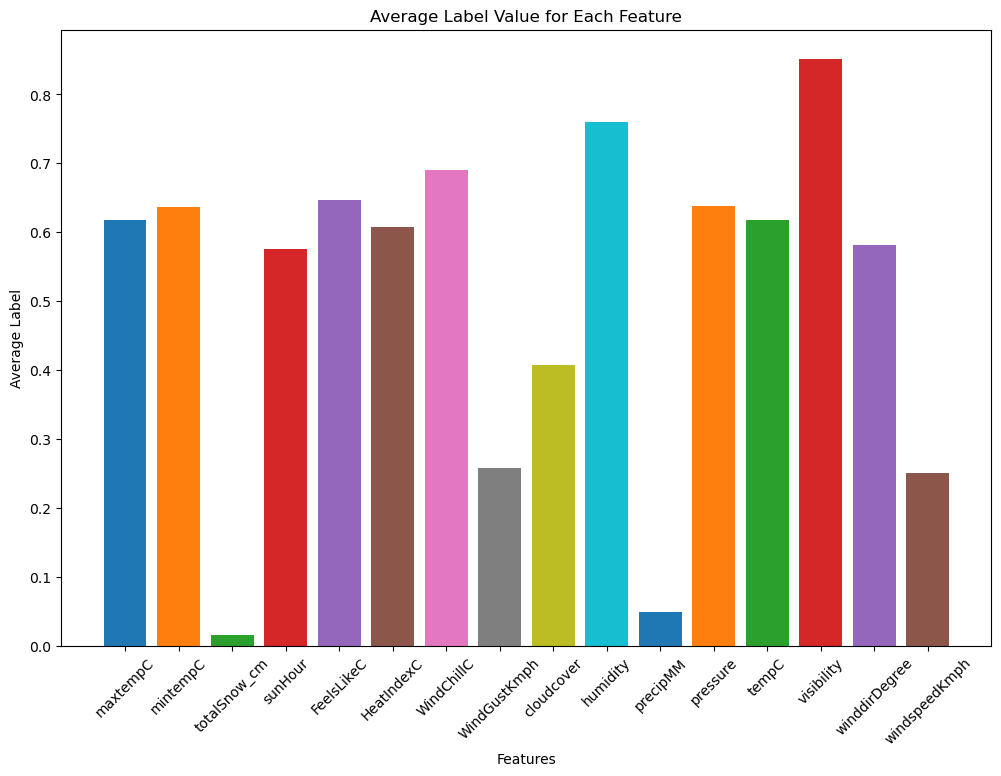

In [19]:
features = df_normalized.columns[:-1]  # Assuming last column is the label
average_labels = []

for feature in features:
    if pd.api.types.is_numeric_dtype(df_normalized[feature]):
        average_label = df_normalized.groupby('target')[feature].mean()
        average_labels.append(average_label)
    else:
        average_labels.append(None)

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    if average_labels[i] is not None:
        plt.bar(feature, average_labels[i])
    else:
        print(f"Skipping non-numeric feature: {feature}")

plt.xlabel('Features')
plt.ylabel('Average Label')
plt.title('Average Label Value for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [20]:
# importing the libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

In [21]:
# Define the numeric columns
X = df_normalized.drop('target',axis=1)
y = df_normalized['target']
num_cols = X.select_dtypes(include='number').columns.to_list()

In [22]:
# Create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

In [23]:
#Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols)],
#         ('cat', categorical_transformer, cat_cols)],
         remainder='passthrough'
)

In [24]:
# Create and apply the preprocessing pipeline
data_prepared = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#inital the estimator as RandomForestClassifier
y = y.ravel()
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
#use RFE to choose the attribute
selector = RFE(estimator, n_features_to_select=16, step=1)
selector = selector.fit(data_prepared, y)
#get attributes' name
selected_features = data_prepared.columns[selector.support_]

In [71]:
data_prepared

,num__maxtempC,num__mintempC,num__totalSnow_cm,num__sunHour,num__FeelsLikeC,num__HeatIndexC,num__WindChillC,num__WindGustKmph,num__cloudcover,num__humidity,num__precipMM,num__pressure,num__tempC,num__visibility,num__winddirDegree,num__windspeedKmph
0,-0.087397,-0.183557,-0.118674,0.148640,0.062267,-0.000080,0.108032,0.106459,-0.771183,-0.867965,-0.390728,0.104256,-0.087397,0.810571,0.265118,0.383861
1,-1.032602,-0.817575,-0.118674,-0.097845,-1.025681,-0.923065,-1.040265,1.794427,-0.406050,-0.867965,-0.125727,2.004052,-1.032602,0.233080,-1.885060,2.127491
2,0.943737,0.541036,-0.118674,0.395124,0.642506,0.671182,0.720458,-0.588587,0.214676,0.477667,-0.016072,0.104256,0.943737,0.233080,0.523684,-0.567210
3,0.170387,-0.092983,-0.118674,0.888092,0.062267,-0.083987,0.108032,-0.687879,-0.990262,-1.009610,-0.399866,1.596953,0.170387,0.810571,-0.578623,-0.567210
4,0.256314,-0.092983,-0.118674,0.395124,0.062267,-0.000080,0.108032,0.404335,-0.844209,0.760957,-0.399866,-0.438543,0.256314,0.810571,-0.850797,0.383861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1.373376,1.265629,-0.118674,1.381060,1.440335,1.510260,1.332883,-0.489295,-0.442563,-0.230561,-0.399866,-0.438543,1.373376,-0.344410,0.442031,-0.725722
1049,0.342242,0.450462,-0.118674,0.888092,0.352386,0.251644,0.414245,-0.489295,-0.807696,0.123553,-0.399866,0.239955,0.342242,0.233080,-0.932450,-0.408699
1050,-0.860747,-0.274131,-0.118674,-2.069718,-0.735562,-0.587434,-0.734053,3.780272,1.748233,-0.088915,0.130136,-1.117042,-0.860747,0.233080,1.993426,3.712609
1051,-0.946674,-0.908149,-0.118674,0.641608,-1.025681,-0.923065,-1.040265,0.900797,-1.318882,-2.213596,-0.399866,0.104256,-0.946674,0.810571,1.517121,0.700884


In [72]:
# Assuming 'data_prepared' is your feature matrix and 'y' is your target variable
# Replace 'selected_features' with the actual features you want to use for prediction
X = data_prepared[selected_features]
y = y.ravel()

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Print the shapes of the datasets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (421, 16), Validation set: (379, 16), Test set: (253, 16)


In [73]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded into a DataFrame named 'data'
# Split data into features (X) and target variable (y)
# X = data_prepared.drop('target', axis=1)  # Features
# y = data_prepared['target']               # Target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Feature scaling (optional, but can be beneficial for some models like logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predictions
log_reg_predictions = log_reg_model.predict(X_test_scaled)

# Model evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

# Model evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Gradient Boosting (XGBoost)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
xgb_predictions = xgb_model.predict(X_test)

# Model evaluation
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))


Logistic Regression Accuracy: 0.6403162055335968
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       168
         1.0       0.45      0.31      0.36        85

    accuracy                           0.64       253
   macro avg       0.57      0.56      0.56       253
weighted avg       0.61      0.64      0.62       253


Random Forest Accuracy: 0.6284584980237155
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.73       168
         1.0       0.44      0.41      0.43        85

    accuracy                           0.63       253
   macro avg       0.58      0.57      0.58       253
weighted avg       0.62      0.63      0.62       253


XGBoost Accuracy: 0.616600790513834
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       168
         1.0       0.44      0.48     

In [76]:
sample_instance = {
    'maxtempC': 0.684,
    'mintempC': 0.723,
    'totalSnow_cm': 0.215,
    'sunHour': 0.845,
    'FeelsLikeC': 0.537,
    'HeatIndexC': 0.629,
    'WindChillC': 0.732,
    'WindGustKmph': 0.456,
    'cloudcover': 0.321,
    'humidity': 0.478,
    'precipMM': 0.123,
    'pressure': 0.589,
    'tempC': 0.701,
    'visibility': 0.874,
    'winddirDegree': 0.259,
    'windspeedKmph': 0.567
}

# sample_instance = {
#     'pressure': 0.889,
#     'tempC': 0.801,
#     'visibility': 0.674,
#     'winddirDegree': 0.959,
#     'windspeedKmph': 0.167
# }

# sample_instance2 = {
#     'pressure': 0.649123,
#     'tempC': 0.586207,
#     'visibility': 1,
#     'winddirDegree': 0.615616,
#     'windspeedKmph': 0.282609
# }

In [77]:
# Convert dictionary to numpy array
instance = np.array([[v for k, v in sample_instance.items()]])

# Make a prediction
prediction = log_reg_model.predict(instance)

# Print the prediction
print("Prediction:", prediction)

Prediction: [0.]


In [65]:
# Convert dictionary to numpy array
instance = np.array([[v for k, v in sample_instance2.items()]])

# Make a prediction
prediction = log_reg_model.predict(instance)

# Print the prediction
print("Prediction:", prediction)

Prediction: [0.]


In [47]:
import random

# Define the range for each feature
pressure_range = (0, 1)
tempC_range = (0, 1)
visibility_range = (0, 10)
winddirDegree_range = (0, 360)
windspeedKmph_range = (0, 100)


In [66]:
import numpy as np

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
    # Generate random values for each feature within the specified range
    sample_instance2 = {
        'pressure': random.uniform(*pressure_range),
        'tempC': random.uniform(*tempC_range),
        'visibility': random.uniform(*visibility_range),
        'winddirDegree': random.uniform(*winddirDegree_range),
        'windspeedKmph': random.uniform(*windspeedKmph_range)
    }
    print(sample_instance2)
    
    # Convert dictionary to numpy array
    instance = np.array([[v for k, v in sample_instance2.items()]])
    
    # Make a prediction
    prediction = log_reg_model.predict(instance)
    
    # Print the prediction
    print("Prediction for iteration", i+1, ":", prediction)


{'pressure': 0.5699817123976377, 'tempC': 0.8702323127178319, 'visibility': 7.06293550481022, 'winddirDegree': 193.52358423296823, 'windspeedKmph': 39.945769422073454}
Prediction for iteration 1 : [1.]
{'pressure': 0.9373121300250667, 'tempC': 0.25180090443788217, 'visibility': 9.78312702583075, 'winddirDegree': 165.65297880268454, 'windspeedKmph': 22.228505940147414}
Prediction for iteration 2 : [1.]
{'pressure': 0.6142274541001659, 'tempC': 0.41397385343934945, 'visibility': 8.405130105527416, 'winddirDegree': 335.21143543139306, 'windspeedKmph': 81.11054937231474}
Prediction for iteration 3 : [1.]
{'pressure': 0.9886451455573827, 'tempC': 0.5095960411475092, 'visibility': 6.273385169455143, 'winddirDegree': 316.4715540074823, 'windspeedKmph': 47.36047635064492}
Prediction for iteration 4 : [1.]
{'pressure': 0.21332333614972177, 'tempC': 0.8862432839037294, 'visibility': 7.138140072739488, 'winddirDegree': 127.10275227206246, 'windspeedKmph': 13.470079709594929}
Prediction for iterat

In [96]:
# Number of iterations
num_iterations = 100

for i in range(num_iterations):
    # Generate random values for each feature within the specified range
    sample_instance = {
        'maxtempC': random.uniform(0, 1),
        'mintempC': random.uniform(0, 1),
        'totalSnow_cm': random.uniform(0, 1),
        'sunHour': random.uniform(0, 1),
        'FeelsLikeC': random.uniform(0, 1),
        'HeatIndexC': random.uniform(0, 1),
        'WindChillC': random.uniform(0, 1),
        'WindGustKmph': random.uniform(0, 1),
        'cloudcover': random.uniform(0, 1),
        'humidity': random.uniform(0, 1),
        'precipMM': random.uniform(0, 1),
        'pressure': random.uniform(0, 1),
        'tempC': random.uniform(0, 1),
        'visibility': random.uniform(0, 1),
        'winddirDegree': random.uniform(0, 1),
        'windspeedKmph': random.uniform(0, 1)
    }
    
    # Convert dictionary to numpy array
    instance = np.array([[v for k, v in sample_instance.items()]])
    
    # Make a prediction
    prediction = log_reg_model.predict(instance)
    
    # Print the prediction
    print("Prediction for iteration", i+1, ":", prediction)


Prediction for iteration 1 : [1.]
Prediction for iteration 2 : [0.]
Prediction for iteration 3 : [1.]
Prediction for iteration 4 : [0.]
Prediction for iteration 5 : [1.]
Prediction for iteration 6 : [0.]
Prediction for iteration 7 : [1.]
Prediction for iteration 8 : [0.]
Prediction for iteration 9 : [1.]
Prediction for iteration 10 : [1.]
Prediction for iteration 11 : [0.]
Prediction for iteration 12 : [0.]
Prediction for iteration 13 : [0.]
Prediction for iteration 14 : [0.]
Prediction for iteration 15 : [0.]
Prediction for iteration 16 : [0.]
Prediction for iteration 17 : [0.]
Prediction for iteration 18 : [0.]
Prediction for iteration 19 : [0.]
Prediction for iteration 20 : [0.]
Prediction for iteration 21 : [1.]
Prediction for iteration 22 : [0.]
Prediction for iteration 23 : [0.]
Prediction for iteration 24 : [1.]
Prediction for iteration 25 : [1.]
Prediction for iteration 26 : [0.]
Prediction for iteration 27 : [0.]
Prediction for iteration 28 : [1.]
Prediction for iteration 29 :

In [ ]:
import pandas as pd

# Sample data (replace with your own data)
data = {'date': ['2024-01-01', '2024-01-02', '2024-01-03'],
        'prediction': [1, 0, 1]}  # 1 indicates outage, 0 indicates no outage
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Calculate daily probabilities
prob_outage_per_day = df['prediction'].mean()

# Calculate probability over the entire time range
start_date = df['date'].min()
end_date = df['date'].max()
num_days = (end_date - start_date).days + 1  # Including both start and end dates
overall_probability = prob_outage_per_day * num_days / len(df)

print(f"Overall probability of outage: {overall_probability}")

In [82]:
import urllib.parse
import os
import pandas as pd

In [85]:
!pip install wwo-hist

In [86]:
from wwo_hist import retrieve_hist_data

import os

In [101]:
def mainRun(city,date):
    api_key = '54278ea2bf104965bef84824241802'
    location = city
    encoded_location = urllib.parse.quote(location)
    start_date = date
    end_date = date # Use a different date for the end date
    frequency = 24

    response = retrieve_hist_data(api_key=api_key,
                                   location_list=[encoded_location],
                                   start_date=start_date,
                                   end_date=end_date,
                                   frequency=frequency)
    
    df = pd.read_csv(city + '.csv')

    # Convert the DataFrame into an array of dictionaries

    for index, row in df.iterrows():
        sample_instance = {
            'maxtempC': row['maxtempC'],
            'mintempC': row['mintempC'],
            'totalSnow_cm': row['totalSnow_cm'],
            'sunHour': row['sunHour'],
            'FeelsLikeC': row['FeelsLikeC'],
            'HeatIndexC': row['HeatIndexC'],
            'WindChillC': row['WindChillC'],
            'WindGustKmph': row['WindGustKmph'],
            'cloudcover': row['cloudcover'],
            'humidity': row['humidity'],
            'precipMM': row['precipMM'],
            'pressure': row['pressure'],
            'tempC': row['tempC'],
            'visibility': row['visibility'],
            'winddirDegree': row['winddirDegree'],
            'windspeedKmph': row['windspeedKmph']
        }
    
    # Convert dictionary to numpy array
    instance = np.array([[v for k, v in sample_instance.items()]])
    instance_normalized = (instance - instance.min()) / (instance.max() - instance.min())
    
    # Make a prediction
    prediction = log_reg_model.predict(instance_normalized)
    
    # Print the prediction
    print("Prediction for iteration", i+1, ":", prediction)
    return prediction
    

In [105]:
mainRun('Illinois','2/7/2014')



Retrieving weather data for Illinois


Currently retrieving data for Illinois: from 2014-02-07 to 2014-02-07


C:\Users\Heliiix\anaconda3\Lib\site-packages\wwo_hist\__init__.py:69: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_mon_begin = pd.date_range(start_date, end_date, freq='MS', closed='right')
C:\Users\Heliiix\anaconda3\Lib\site-packages\wwo_hist\__init__.py:74: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  list_mon_end = pd.date_range(start_date, end_date, freq='M', closed='left')


Time elapsed (hh:mm:ss.ms) 0:00:00.236893


export Illinois completed!


Prediction for iteration 100 : [0.]


array([0.])